# XGBoost_GridSearchCV_sin Authory, Geometry e id.

1. Vamos a cargar el dataset e importamos las librerias. 


In [1]:
#Importamos las librerias, cargamos el fichero y vemos las columnas. 

import csv
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/data.csv')

data_copia = data.copy()

data_copia.head(1)


,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.0,3770.0,0.1754,NaN,10.8,432.0,3.6


# Rellenamos los valores nulos con la media de la columna pero dentro de cada uno de los grupos de geometria y luego vemos cuantos nulos siguen quedando. 

In [2]:
# Función para rellenar los valores nulos con la media de la columna dentro de cada grupo de geometría
def fill_nulls_with_group_mean(group):
    return group.fillna(group.mean())

# Rellenar los valores nulos en las columnas seleccionadas con la media de su grupo de geometría
columns_to_fill = ['pressure [MPa]', 'mass_flux [kg/m2-s]', 'D_e [mm]', 'D_h [mm]', 'length [mm]']
df_filled = data_copia.groupby('geometry')[columns_to_fill].transform(fill_nulls_with_group_mean)

# Actualizar las columnas seleccionadas en el DataFrame original
data_copia[columns_to_fill] = df_filled

# Contar los valores nulos que quedan
null_counts = data_copia[columns_to_fill].isnull().sum()

print("Valores nulos después del relleno:")
print(null_counts)

Valores nulos después del relleno:
pressure [MPa]         5500
mass_flux [kg/m2-s]    5500
D_e [mm]               5500
D_h [mm]               5500
length [mm]            5500
dtype: int64


# Vemos que todavía quedan valores nulos y estos los imputamos con los valores nulos de la columna. 

In [3]:
# Los valores nulos que quedan ahora los rellenaoms con la media de su columna. 

# Columnas para rellenar con la media de su columna
columns_to_fill = ['pressure [MPa]', 'mass_flux [kg/m2-s]', 'D_e [mm]', 'D_h [mm]', 'length [mm]']

# Rellenar los valores nulos en las columnas seleccionadas con la media de su columna
data_copia[columns_to_fill] = data[columns_to_fill].fillna(data_copia[columns_to_fill].mean())

# Contar los valores nulos que quedan
null_counts = data_copia[columns_to_fill].isnull().sum()

print("Valores nulos después del relleno:")
print(null_counts)

Valores nulos después del relleno:
pressure [MPa]         0
mass_flux [kg/m2-s]    0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
dtype: int64


# Los valores nulos que quedan son de columnas que vamos a eliminar o de la Y. 

In [4]:
# Contar valores nulos en cada columna. 

valores_nulos = data_copia.isnull().sum()

print(valores_nulos)


id                         0
author                  5024
geometry                5500
pressure [MPa]             0
mass_flux [kg/m2-s]        0
x_e_out [-]            10415
D_e [mm]                   0
D_h [mm]                   0
length [mm]                0
chf_exp [MW/m2]            0
dtype: int64


# Separamos el Dataframe en dos.

i) Un DataFrame con filas que contienen NaN en 'x_e_out [-]'

ii)  Crear un DataFrame sin filas que contienen NaN en 'x_e_out [-]'

In [5]:
# Separo el nuevo DataFrame en dos:

# Crear un DataFrame con filas que contienen NaN en 'x_e_out [-]'

df_nan = data_copia[data_copia['x_e_out [-]'].isnull()]

# Crear un DataFrame sin filas que contienen NaN en 'x_e_out [-]'

df_sin_nan = data_copia[~data_copia['x_e_out [-]'].isnull()]

print("Data_copia: ", data_copia.shape)
print("Data con los NUN:", df_nan.shape)
print("Data sin los NUN: ", df_sin_nan.shape)

Data_copia:  (31644, 10)
Data con los NUN: (10415, 10)
Data sin los NUN:  (21229, 10)


# Antes de entrenar el modelo, vamos a eliminar aquellas columnas que no interesan. 

In [6]:
# Antes de entrenar el modelo creamos el nuevo DF_sin NAN 

new_df_sin_nan = df_sin_nan.drop(['id', 'author', 'geometry'], axis=1)

# Probamos el modelo de XG_Boost y sacamos las principales metricas para ver el rendimiento. 

In [7]:
# Entrenamos el modelo

# Ahora vamos a entrenar el modelo 

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Separar las características (X) y la variable objetivo (y)
X = new_df_sin_nan.drop('x_e_out [-]', axis=1)
y = df_sin_nan['x_e_out [-]']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto Scaler y ajustarlo a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo XGBoost con los mejores hiperparámetros
modelo_XGB = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
modelo_XGB.fit(X_train_scaled, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred = modelo_XGB.predict(X_test_scaled)

# Calcular el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular el R cuadrado
r2 = r2_score(y_test, y_pred)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 0.07509197451789079
R-squared: 0.44486807699061515
Mean Squared Error (MSE): 0.0056388046369955595
Mean Absolute Error (MAE): 0.05214899232068931


# Gráfico de barras que resuma las métricas de evaluación, como RMSE, MSE y MAE

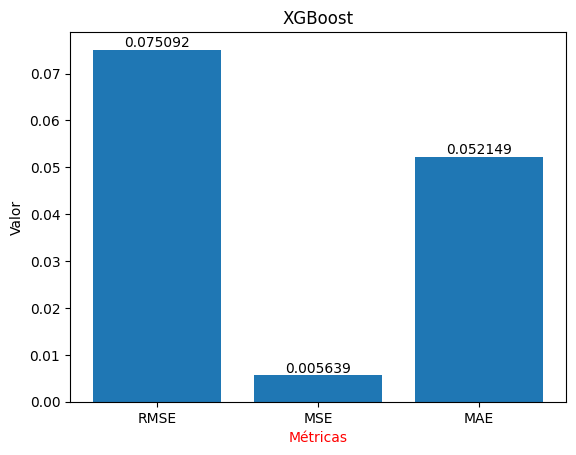

In [25]:
# Definir las métricas y sus valores
metricas = ['RMSE', 'MSE', 'MAE']
valores = [rmse, mse, mae]  # Asegúrate de tener los valores reales de las métricas

# Crear el gráfico de barras
plt.bar(metricas, valores)
plt.xlabel('Métricas', color="red")
plt.ylabel('Valor')
plt.title('XGBoost')

# Agregar los valores sobre las barras
for i, valor in enumerate(valores):
    plt.text(i, valor, str(round(valor, 6)), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


# Comparación del R2 de XGBoost y Random Forest

# Realizamos graficos de dispersión para comparar los valores reales y la predicción 

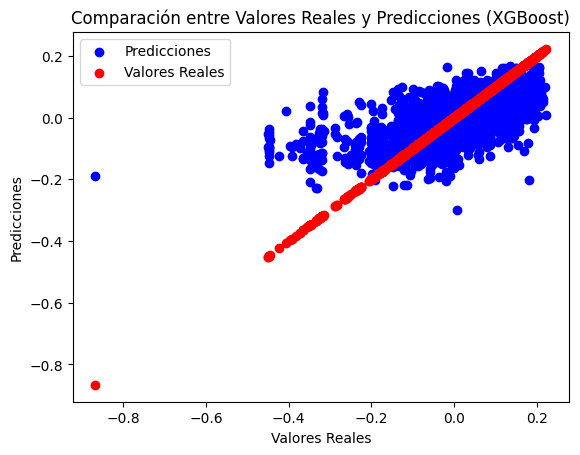

In [8]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(y_test, y_pred, c='b', label='Predicciones')  # Puntos azules para predicciones
plt.scatter(y_test, y_test, c='r', label='Valores Reales')  # Puntos rojos para valores reales
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones (XGBoost)')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


# Gráfico de residuos

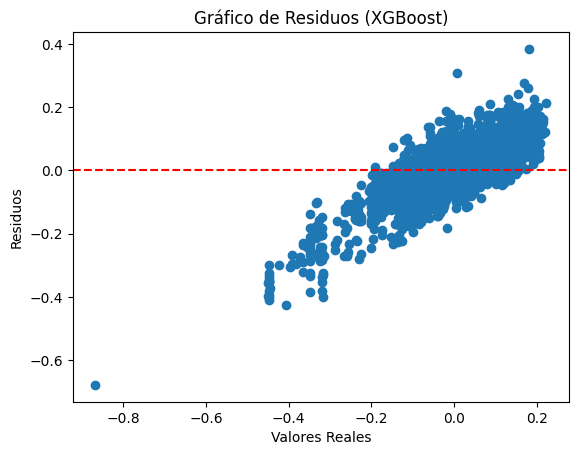

In [10]:
import matplotlib.pyplot as plt

# Calcular los residuos
residuos = y_test - y_pred

# Crear el gráfico de residuos
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='--')  # Agregar una línea horizontal en 0 para referencia
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos (XGBoost)')

# Mostrar el gráfico
plt.show()


# Ponemos en el mismo formato el Data Frame de entrenamiento y aquel sobre el que vamos hacer las predicciones. 

In [8]:
# Reordenar las columnas en df_nan para que coincida con el orden de new_df_sin_nan
df_nan = df_nan[['id', 'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]', 'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]']]

# Asegurarse de que las columnas estén en el mismo orden y tengan los mismos nombres
df_nan.columns = ['id', 'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]', 'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]']

In [9]:
df_nan.head(1)


,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
4,4,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [25]:

column_id = new_df_sin_nan['id']
new_df_sin_nan = new_df_sin_nan.drop('id', axis=1)  # Eliminar la columna 'id' del DataFrame
new_df_sin_nan.insert(0, 'id', column_id)  # Insertar la columna 'id' al principio del DataFrame



In [33]:
# Preprocesamiento del DataFrame df_nan
df_nan_processed = df_nan.drop(['id', 'x_e_out [-]'], axis=1)  # Eliminar las columnas 'id' y 'x_e_out [-]'
df_nan_scaled = scaler.transform(df_nan_processed)  # Aplicar el escalado

# Realizar predicciones sobre df_nan preprocesado
y_pred = modelo_XGB.predict(df_nan_scaled)  # Predicciones

# Crear DataFrame para la presentación (submission)
submission_df = pd.DataFrame({'id': df_nan['id'], 'x_e_out [-]': y_pred})

# Guardar la presentación (submission) en un archivo CSV
submission_df.to_csv('submission16.csv', index=False)

